In [3]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()

In [69]:
class Markowitz:
    def __init__(self, tickers:list, start: str, end: str) -> None:
        self.tickers = tickers
        self.start = start
        self.end = end
        self.log_returns = self.get_logarithmic_returns(tickers=self.tickers, start=self.start, end=self.end)
        self.n_assets = self.log_returns.shape[1]
        self.efficient_frontier = None
    
    def get_logarithmic_returns(self, tickers: list, start: str, end: str)-> pd.DataFrame:
        data = yf.download(tickers=tickers, start=start, end=end)["Adj Close"]
        data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0) * 100, columns=data.columns)
        data = data.dropna(axis=0)
        return data
    
    def get_efficient_frontier(self):
        n_assets = self.n_assets
        log_returns = self.log_returns
        mu = np.mean(log_returns, axis=0).to_numpy()
        cov = np.cov(log_returns, rowvar=False)
        C1 = np.linalg.inv(cov)
        a = np.matmul(np.matmul(mu, C1), mu)
        b = np.matmul(np.ones((1, n_assets)) ,np.matmul(C1, mu))[0]
        d = np.matmul(np.ones((1, n_assets)), np.matmul(C1, np.ones((n_assets,1))))[0][0]
        wvarmin = (1/d) * np.matmul(C1, np.ones((6,1)))
        sigmamin = 1/np.sqrt(d)
        mumin = b/d
        sigma_p = np.arange(sigmamin, 5, 0.0001)
        upper_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
        upper_optimal_PF[:,0] = sigma_p
        for i in range(0,upper_optimal_PF.shape[0]):
            upper_optimal_PF[i,1] = mumin + np.sqrt((np.square(upper_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))
        lower_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
        lower_optimal_PF[:,0] = sigma_p
        for i in range(0,lower_optimal_PF.shape[0]):
            lower_optimal_PF[i,1] = mumin - np.sqrt((np.square(lower_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))
        efficient_frontier = np.concatenate((upper_optimal_PF, lower_optimal_PF))
        efficient_frontier = pd.DataFrame(efficient_frontier, columns=['std', 'mu'])
        self.efficient_frontier = efficient_frontier

    def plot_efficient_frontier(self):
        if self.efficient_frontier is None:
            print('No efficient frontier computed')
        else:
            sns.scatterplot(x = self.efficient_frontier['std'], y = self.efficient_frontier['mu'])

    def get_minimum_variance_portfolio(self):
        pass

In [72]:
PF = Markowitz(tickers=["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2018-12-31")

[*********************100%%**********************]  6 of 6 completed


In [73]:
PF.get_efficient_frontier()

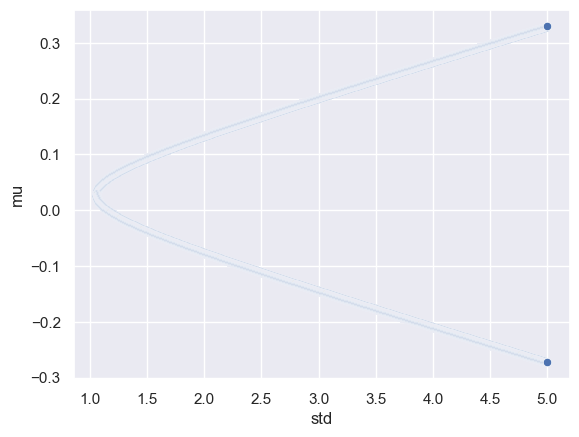

In [74]:
PF.plot_efficient_frontier()

In [6]:
def get_logarithmic_returns(tickers: list, start: str, end: str)-> pd.DataFrame:
        data = yf.download(tickers=tickers, start=start, end=end)
        data = data["Adj Close"]
        data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0) * 100, columns=data.columns)
        data = data.dropna(axis=0)
        return data
log_returns = get_logarithmic_returns(tickers=["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2018-12-31")

[*********************100%%**********************]  6 of 6 completed


Efficient Frontier

In [50]:
def get_efficient_frontier(log_returns):
    n_assets = log_returns.shape[1]
    mu = np.mean(log_returns, axis=0).to_numpy()
    cov = np.cov(log_returns, rowvar=False)
    C1 = np.linalg.inv(cov)
    a = np.matmul(np.matmul(mu, C1), mu)
    b = np.matmul(np.ones((1, n_assets)) ,np.matmul(C1, mu))[0]
    d = np.matmul(np.ones((1, n_assets)), np.matmul(C1, np.ones((n_assets,1))))[0][0]
    wvarmin = (1/d) * np.matmul(C1, np.ones((6,1)))
    sigmamin = 1/np.sqrt(d)
    mumin = b/d
    sigma_p = np.arange(sigmamin, 5, 0.0001)
    upper_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
    upper_optimal_PF[:,0] = sigma_p
    for i in range(0,upper_optimal_PF.shape[0]):
        upper_optimal_PF[i,1] = mumin + np.sqrt((np.square(upper_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))
    lower_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
    lower_optimal_PF[:,0] = sigma_p
    for i in range(0,lower_optimal_PF.shape[0]):
        lower_optimal_PF[i,1] = mumin - np.sqrt((np.square(lower_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))
    efficient_frontier = np.concatenate((upper_optimal_PF, lower_optimal_PF))
    efficient_frontier = pd.DataFrame(efficient_frontier, columns=['std', 'mu'])
    return efficient_frontier

In [51]:
test1 = get_efficient_frontier(log_returns=log_returns)

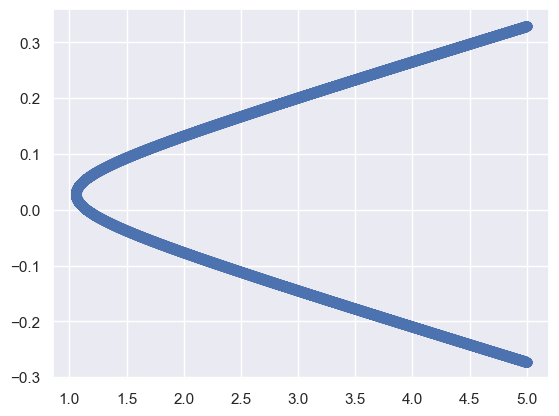

In [54]:
plt.scatter(x=test1['std'], y=test1['mu'])

In [32]:
test2

array([[ 1.05710947,  0.02813729],
       [ 1.05720947,  0.02724172],
       [ 1.05730947,  0.02687074],
       ...,
       [ 4.99970947, -0.27283499],
       [ 4.99980947, -0.27284129],
       [ 4.99990947, -0.27284759]])

In [33]:
test1.shape

(39429, 2)

In [37]:
np.concatenate((test1, test2)).shape

(78858, 2)

In [14]:
sigma_p = np.arange(sigmamin, 5, 0.0001)

In [16]:
upper_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
upper_optimal_PF[:,0] = sigma_p

In [17]:
for i in range(0,upper_optimal_PF.shape[0]):
    upper_optimal_PF[i,1] = mumin + np.sqrt((np.square(upper_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))

C:\Users\morit\AppData\Local\Temp\ipykernel_10196\2263337394.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  upper_optimal_PF[i,1] = mumin + np.sqrt((np.square(upper_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))


In [18]:
lower_optimal_PF = np.empty(shape=(sigma_p.shape[0],2))
lower_optimal_PF[:,0] = sigma_p
for i in range(0,lower_optimal_PF.shape[0]):
    lower_optimal_PF[i,1] = mumin - np.sqrt((np.square(lower_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))

C:\Users\morit\AppData\Local\Temp\ipykernel_10196\2517006218.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lower_optimal_PF[i,1] = mumin - np.sqrt((np.square(lower_optimal_PF[i,0]) - np.square(sigmamin)) * (a - np.square(mumin)/np.square(sigmamin)))


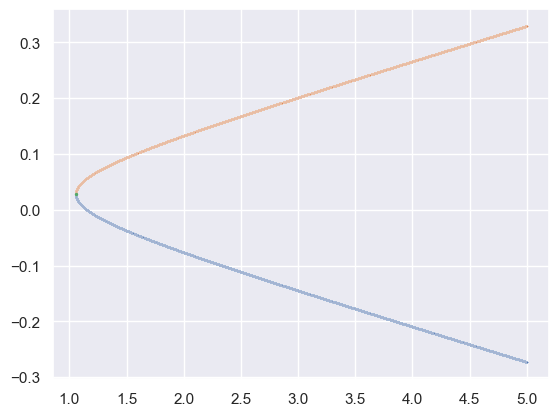

In [20]:
sns.scatterplot(x = lower_optimal_PF[:,0], y = lower_optimal_PF[:,1], s = 1)
sns.scatterplot(x = upper_optimal_PF[:,0], y = upper_optimal_PF[:,1], s = 1)
plt.scatter(x = sigmamin, y = mumin[0][0], s=2)

Simulate random Portfolio

In [4]:
# allow negative pf weights?

In [21]:
cov = np.cov(log_returns, rowvar=False)

In [24]:
def get_random_portfolio_weights(n_portfolios, n_assets):
    random_portfolio_weights = np.random.rand(n_portfolios,n_assets)
    random_portfolio_weights = random_portfolio_weights/random_portfolio_weights.sum(axis=1, keepdims=True)
    return random_portfolio_weights

In [27]:
random_portfolio_weights = get_random_portfolio_weights(500, 6)

In [62]:
(random_portfolio_weights[0] * log_returns).sum(axis=1).mean()

np.float64(-0.016175371238589097)

In [66]:
def simulate_portfolios(n_portfolios, log_returns):
    
    random_portfolio_weights = get_random_portfolio_weights(n_portfolios=n_portfolios, n_assets=6)
    PFReturns = np.empty(shape=(n_portfolios, 2))
    for i in range(0, n_portfolios):
        temp_return = (random_portfolio_weights[i] * log_returns).sum(axis=1)
        PFReturns[i,0] = temp_return.mean()
        PFReturns[i,1] = temp_return.std()
    return PFReturns
    # PF_mean = PFReturns.mean()
    # PF_std = PFReturns.std()
    # return PF_mean, PF_std

In [68]:
simulated = simulate_portfolios(n_portfolios=500, log_returns=log_returns)

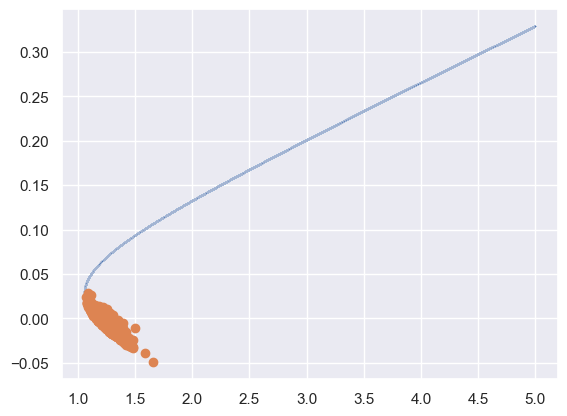

In [73]:
sns.scatterplot(x = upper_optimal_PF[:,0], y = upper_optimal_PF[:,1], s = 1)
plt.scatter(x = simulated[:,1], y = simulated[:,0])